In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()


# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Print the shape of the data
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [3]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(50000, 32, 32, 3, 1)


In [4]:
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

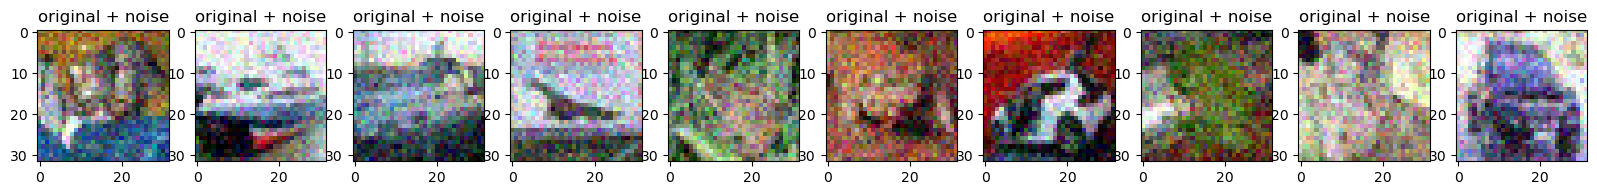

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [13]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0196 - val_loss: 0.0055
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 1

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 67/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 68/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 69/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 70/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 71/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 72/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 73/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 74/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 75/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 76/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 77/100

In [16]:
autoencoder.encoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,608 (6.28 KB)

 Trainable params: 1,608 (6.28 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
autoencoder.decoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 16, 16, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 32, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 3)           │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,187 (8.54 KB)

 Trainable params: 2,187 (8.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

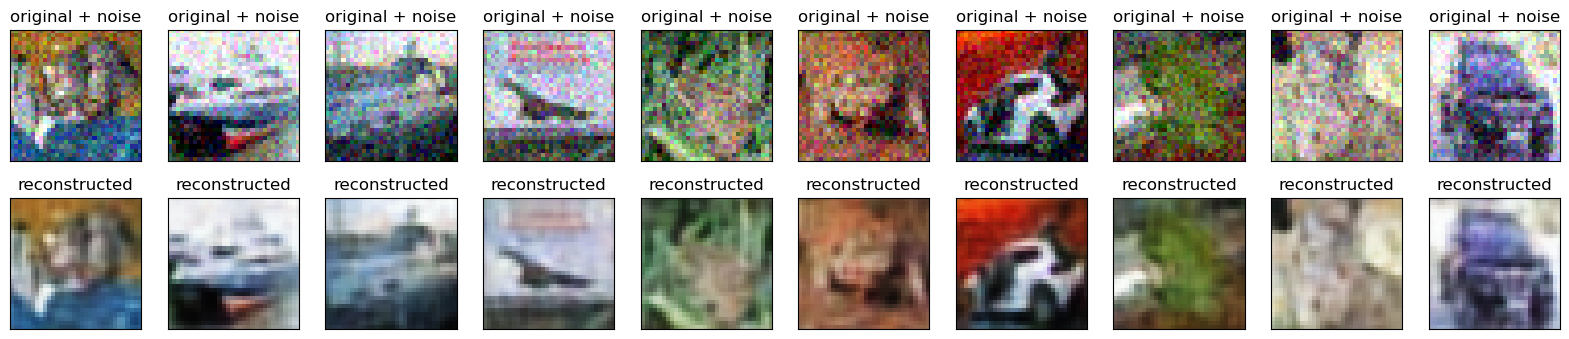

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()